In [1]:
# Pearson's Correlation Examples with Matplotlib and Scikit-learn by Claude

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
from scipy.stats import pearsonr


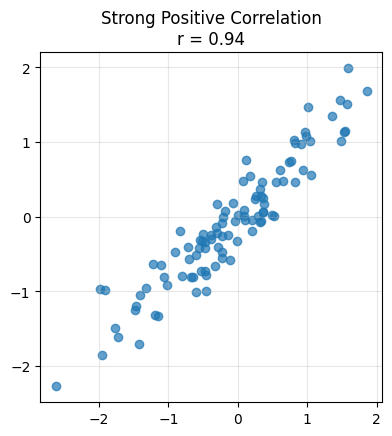

In [2]:
# Set a seed for reproducibility
np.random.seed(42)

# Example 1: Creating datasets with different correlation strengths
# ----------------------------------------------------------------

# Create figure with subplots
plt.figure(figsize=(15, 10))

# Example 1: Strong positive correlation
x1 = np.random.normal(0, 1, 100)
y1 = x1 * 0.9 + np.random.normal(0, 0.3, 100)  # Strong positive correlation
corr1, p_val1 = pearsonr(x1, y1)

plt.subplot(2, 3, 1)
plt.scatter(x1, y1, alpha=0.7)
plt.title(f'Strong Positive Correlation\nr = {corr1:.2f}')
plt.grid(True, alpha=0.3)


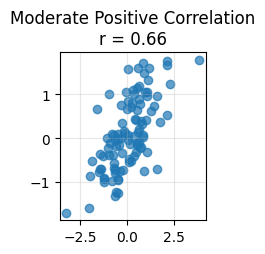

In [3]:
# Example 2: Moderate positive correlation
x2 = np.random.normal(0, 1, 100)
y2 = x2 * 0.5 + np.random.normal(0, 0.7, 100)  # Moderate positive correlation
corr2, p_val2 = pearsonr(x2, y2)

plt.subplot(2, 3, 2)
plt.scatter(x2, y2, alpha=0.7)
plt.title(f'Moderate Positive Correlation\nr = {corr2:.2f}')
plt.grid(True, alpha=0.3)


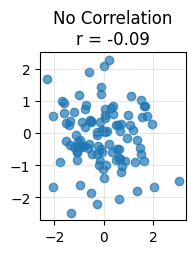

In [4]:
# Example 3: No correlation
x3 = np.random.normal(0, 1, 100)
y3 = np.random.normal(0, 1, 100)  # No correlation
corr3, p_val3 = pearsonr(x3, y3)

plt.subplot(2, 3, 3)
plt.scatter(x3, y3, alpha=0.7)
plt.title(f'No Correlation\nr = {corr3:.2f}')
plt.grid(True, alpha=0.3)


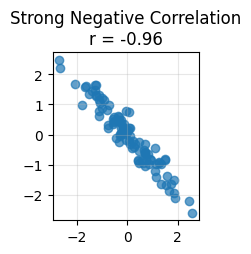

In [5]:

# Example 4: Strong negative correlation
x4 = np.random.normal(0, 1, 100)
y4 = -x4 * 0.9 + np.random.normal(0, 0.3, 100)  # Strong negative correlation
corr4, p_val4 = pearsonr(x4, y4)

plt.subplot(2, 3, 4)
plt.scatter(x4, y4, alpha=0.7)
plt.title(f'Strong Negative Correlation\nr = {corr4:.2f}')
plt.grid(True, alpha=0.3)


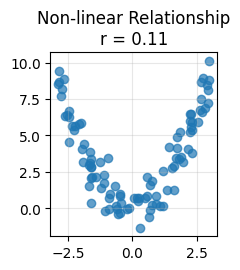

In [6]:
# Example 5: Non-linear relationship (Pearson's limitation)
x5 = np.random.uniform(-3, 3, 100)
y5 = x5**2 + np.random.normal(0, 1, 100)  # Quadratic relationship
corr5, p_val5 = pearsonr(x5, y5)

plt.subplot(2, 3, 5)
plt.scatter(x5, y5, alpha=0.7)
plt.title(f'Non-linear Relationship\nr = {corr5:.2f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Correlation Matrix:
              study_hours  sleep_hours  stress_level  exam_score
study_hours      1.000000    -0.986440      0.994612    0.967298
sleep_hours     -0.986440     1.000000     -0.989896   -0.977196
stress_level     0.994612    -0.989896      1.000000    0.969794
exam_score       0.967298    -0.977196      0.969794    1.000000


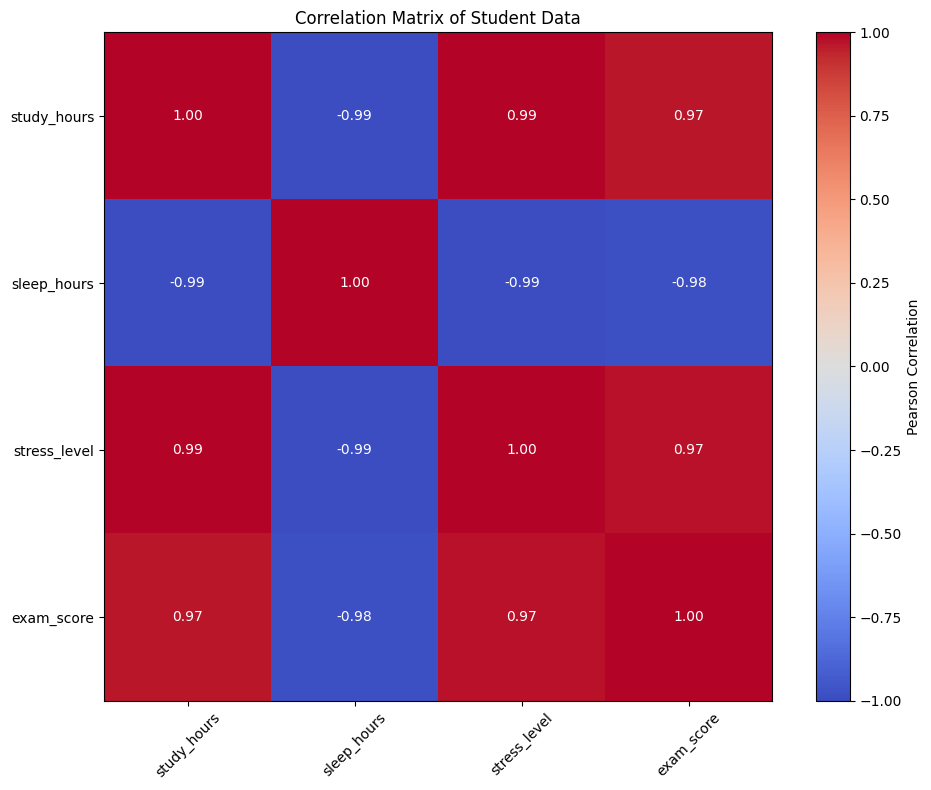

In [7]:
# Example 2: Calculating correlation matrix with real-world data
# -------------------------------------------------------------

# Creating a small dataset representing student data
student_data = {
    'study_hours': [2, 3, 5, 8, 6, 4, 7, 9, 10, 1],
    'sleep_hours': [9, 8, 6, 5, 6, 7, 5, 4, 3, 10],
    'stress_level': [3, 4, 6, 8, 7, 5, 7, 9, 10, 2],
    'exam_score': [65, 70, 85, 90, 80, 75, 85, 95, 93, 60]
}

df = pd.DataFrame(student_data)

# Calculate and display correlation matrix
correlation_matrix = df.corr(method='pearson')
print("Correlation Matrix:")
print(correlation_matrix)

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Pearson Correlation')
plt.title('Correlation Matrix of Student Data')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)

# Add correlation values as text
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                 ha='center', va='center', 
                 color='white' if abs(correlation_matrix.iloc[i, j]) > 0.5 else 'black')

plt.tight_layout()
plt.show()


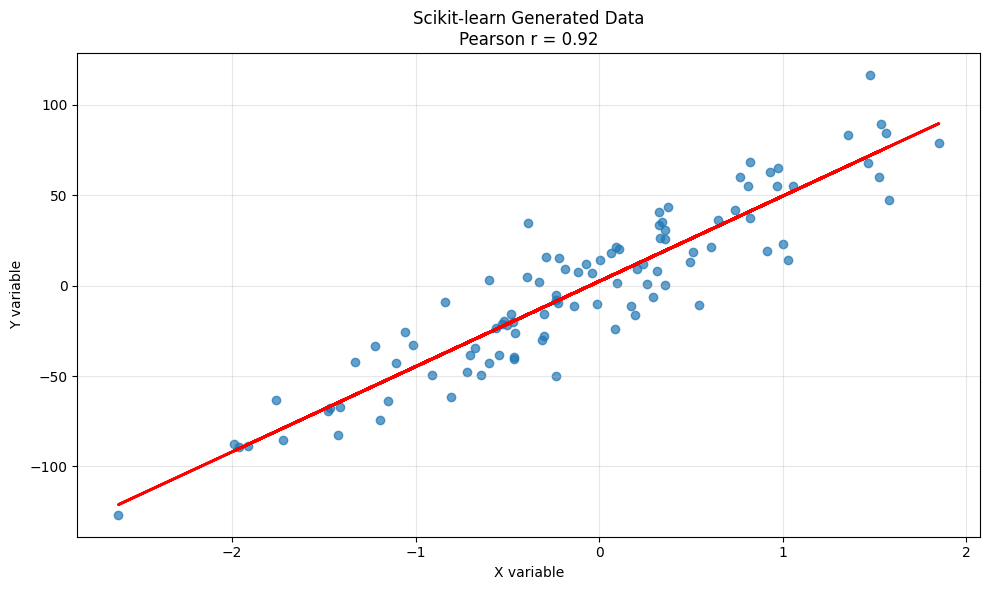

In [8]:
# Example 3: Using scikit-learn for correlation analysis
# -----------------------------------------------------

# Creating a regression dataset with known correlation
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Reshape y to match X's structure for visualization
y = y.reshape(-1, 1)

# Calculating correlation coefficient
corr_coef = np.corrcoef(X.flatten(), y.flatten())[0, 1]

# Visualizing the relationship
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.title(f'Scikit-learn Generated Data\nPearson r = {corr_coef:.2f}')
plt.xlabel('X variable')
plt.ylabel('Y variable')
plt.grid(True, alpha=0.3)

# Adding regression line
m, b = np.polyfit(X.flatten(), y.flatten(), 1)
plt.plot(X, m*X + b, color='red', linewidth=2)

plt.tight_layout()
plt.show()



Correlation with Target Variable:
Feature_1    0.885305
Feature_3    0.360318
Feature_4    0.309303
Feature_2    0.025731
Name: Target, dtype: float64


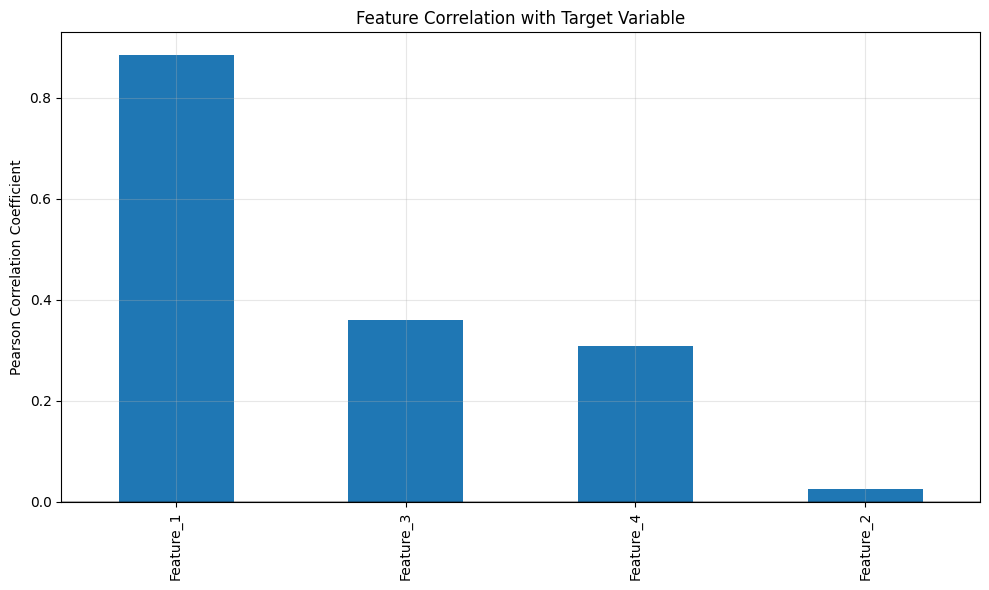

In [9]:
# Example 4: Identifying correlations in multiple features
# -------------------------------------------------------

# Create a dataset with multiple features
multi_X, multi_y = make_regression(n_samples=100, n_features=4, noise=20, random_state=42)

# Creating a DataFrame for easier analysis
feature_names = [f'Feature_{i+1}' for i in range(multi_X.shape[1])]
multi_df = pd.DataFrame(multi_X, columns=feature_names)
multi_df['Target'] = multi_y

# Calculate correlation with the target variable
correlation_with_target = multi_df.corr()['Target'].drop('Target').sort_values(ascending=False)
print("\nCorrelation with Target Variable:")
print(correlation_with_target)

# Visualizing feature correlations with target
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar')
plt.title('Feature Correlation with Target Variable')
plt.ylabel('Pearson Correlation Coefficient')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()
